\begin{equation}\label{eq:model}
    \frac{dS}{dt} = -\frac{\mathcal R_t}{T_{inf}}\,I\,S\,,
    \quad\frac{dE}{dt} = \frac{\mathcal R_t}{T_{inf}}\,I\,S - \frac{E}{T_{inc}}\,,
    \quad\frac{dI}{dt} = \frac{E}{T_{inc}} - \frac{I}{T_{inf}}\,,
    \quad\ S+E+I+R = 100000000\,,
\end{equation}
and one additional equation
\begin{align}\label{eq:completeModelSite}
    D = \alpha_d\, R(t-T_d)\,,
\end{align}

In [46]:
# Model parameters for comparison with the site app
rateR0 = 2.20
Tinf = 2.34 
Tinc = 5.17

tIntervention = 60 # days
rateRt = 1

alphaD = 1
Td = 3

N = 226895473
E0 = 1./N # 1 person was exposed
I0 = 1./N # 1 person was infected
tf = 60 # days

In [47]:
## Solving the ODE
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t): # y = (S,E,I)
    _S = y[0]
    _E = y[1]
    _I = y[2]
    if t < tIntervention:
        _rateR = rateR0
    else:
        _rateR = rateRt
        
    return [
        -(_rateR/Tinf) * _I * _S,
        (_rateR/Tinf) * _I * _S - _E/Tinc,
        _E/Tinc - _I/Tinf
    ]


y0 = [
    1-E0-I0,
    E0,
    I0
]
print(y0)
print(model(y0,0.0))

# time
dt=1
t = np.arange(0,tf+1,dt)

# solve ODE
y = odeint(model,y0,t)

[0.9999999911853685, 4.407315786331268e-09, 4.407315786331268e-09]
[-4.143630189940721e-09, 3.2911513144414433e-09, -1.0309894092576743e-09]


In [48]:
#Site deaths:
vecD = np.zeros_like(y[:,0])
for i in range(len(vecD)-Td):
    vecD[i+Td] = (1-y[i,0]-y[i,1]-y[i,2])*N*alphaD

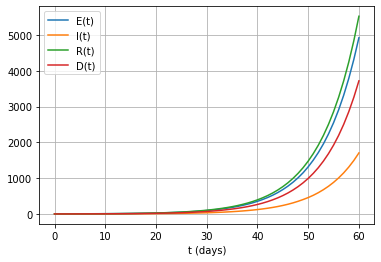

In [51]:
# plot results
#plt.plot(t, y[:,0], label='S(t)')
plt.plot(t, y[:,1]*N, label='E(t)')
plt.plot(t, y[:,2]*N, label='I(t)')
plt.plot(t, (1-y[:,0]-y[:,1]-y[:,2])*N, label='R(t)')
plt.plot(t, vecD, label='D(t)')

plt.xlabel('t (days)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# # Model parameters:
# rateR0 = 2.20
# Tinf = 2.3
# Tinc = 5.2

# tIntervention = 60 # days
# rateRt = 1

# N = 210000000 # 210mi brazilians
# E0 = 1./N # 1 person was exposed
# I0 = 1./N # 1 person was infected

# tf = 30 # days